# What is Distribution Plots?

- Flexibly plot a univariate distribution of observations.
- This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn **`kdeplot()`** and **`rugplot()`** functions. It can also fit scipy.stats distributions and plot the estimated PDF over the data.

### Let's discuss some plots that allow us to visualize the distribution of a dataset. These plots are:

- **`distplot()`**
- **`jointplot()`**
- **`pairplot()`**
- **`rugplot()`**
- **`kdeplot()`**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:ylabel='Density'>

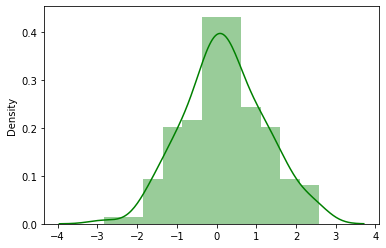

In [3]:
num = np.random.randn(150)
sns.distplot(num,color ='green')

<AxesSubplot:xlabel=' Variable x', ylabel='Density'>

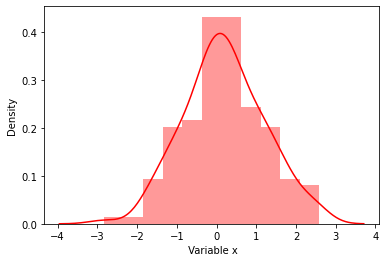

In [4]:
label_dist = pd.Series(num,name = " Variable x")
sns.distplot(label_dist,color = "red")

<AxesSubplot:xlabel=' Variable x', ylabel='Density'>

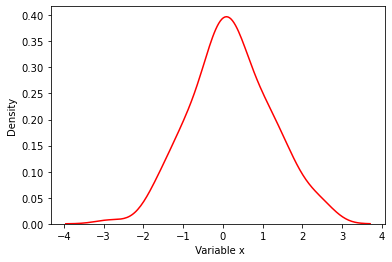

In [5]:
# Plot the distribution with a kenel density. estimate and rug plot:

sns.distplot(label_dist,hist = False,color = "red")

<AxesSubplot:xlabel=' Variable x', ylabel='Density'>

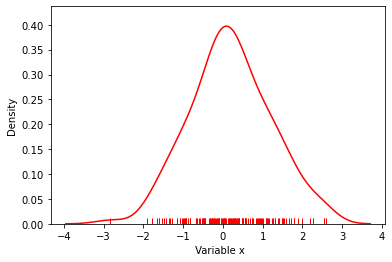

In [6]:
# Plot the distribution with a kenel density estimate and rug plot:

sns.distplot(label_dist,rug = True,hist = False,color = "red")

<AxesSubplot:xlabel=' Variable x'>

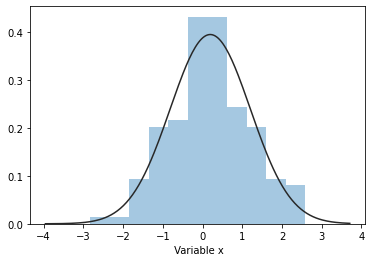

In [7]:
# Plot the distribution with a histogram and maximum likelihood gaussian distribution fit:

from scipy.stats import norm
sns.distplot(label_dist, fit=norm, kde=False)

### Plot the distribution on the vertical axis:

<AxesSubplot:xlabel='Density', ylabel=' Variable x'>

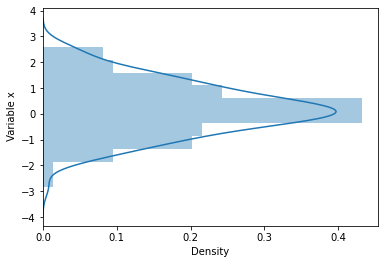

In [8]:
sns.distplot(label_dist, vertical =True)

## Let's implement with dataset

### Data

Seaborn comes with built-in data sets!

In [9]:
tips = sns.load_dataset('tips')

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1 `distplot()`

The **`distplot()`** shows the distribution of a univariate set of observations.

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

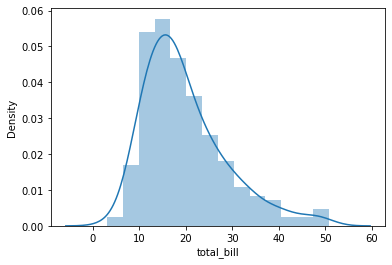

In [11]:
sns.distplot(tips['total_bill'])

<AxesSubplot:xlabel='total_bill'>

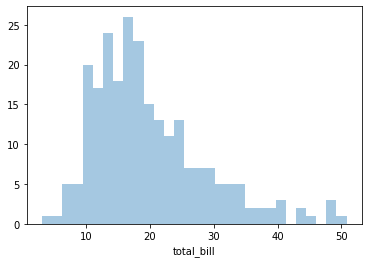

In [12]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

### 2 `jointplot()`

`jointplot()` allows you to basically match up two distplots for bivariate data. With your choice of what kind parameter to compare with:

- `scatter`
- `reg`
- `resid`
- `kde`
- `hex`

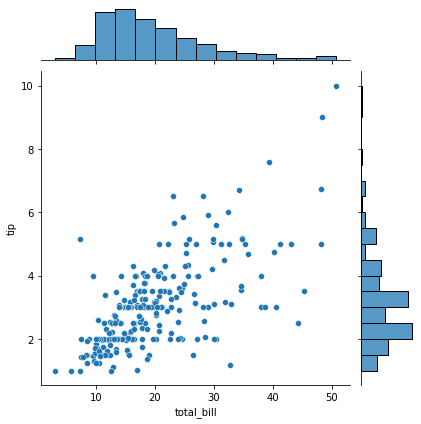

In [13]:
# 'scatter'

sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

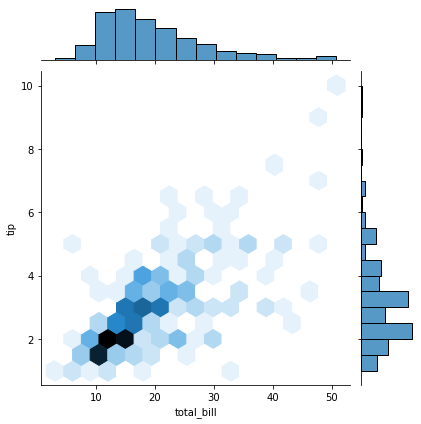

In [14]:
# 'hex'

sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

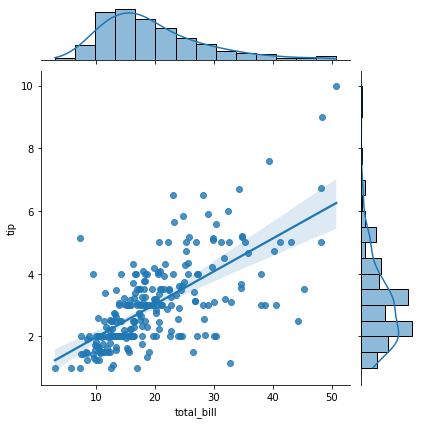

In [15]:
# 'reg'

sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

### 3 `pairplot()`

`pairplot()` will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

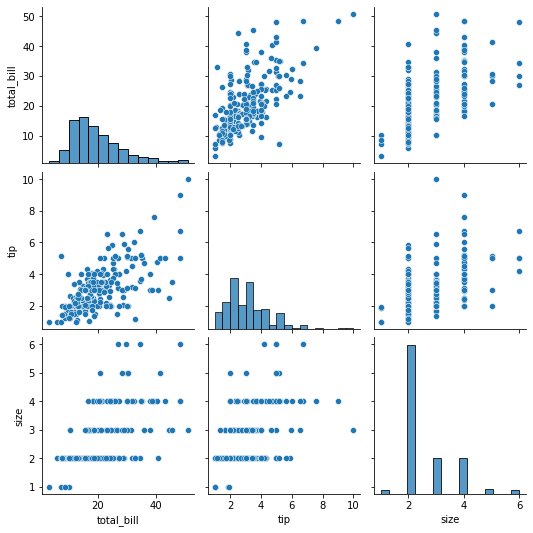

In [16]:
sns.pairplot(tips)

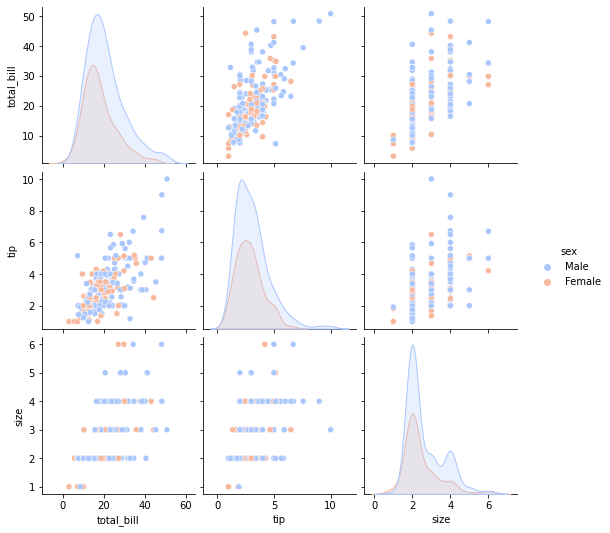

In [17]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

### 4 `rugplot()`

`rugplots()` are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<AxesSubplot:xlabel='total_bill'>

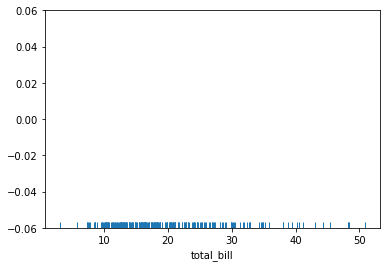

In [18]:
sns.rugplot(tips['total_bill'])

### 5 `kdeplot()`

`kdeplots()` are **[Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth)**. These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0.0, 1.0)

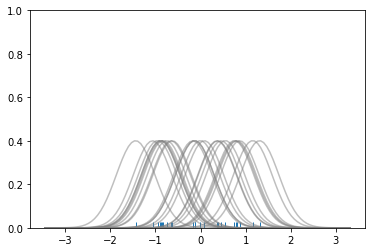

In [19]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

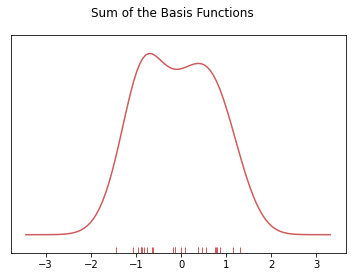

In [20]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

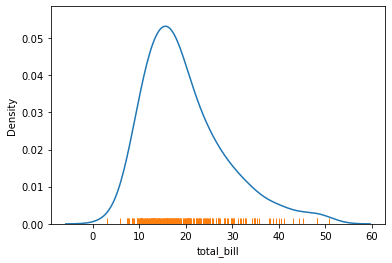

In [21]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

<AxesSubplot:xlabel='tip', ylabel='Density'>

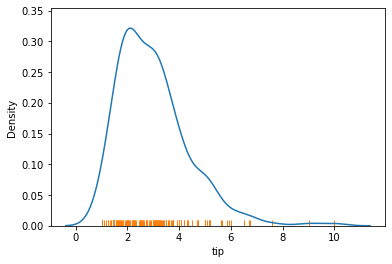

In [22]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])